# 10. Social Graph

## 1. Agglomerative algo: Louvain Modularity Algo

https://github.com/taynaud/python-louvain/blob/master/community/community_louvain.py

Merge nodes into community; choose node to merge with higher community **Modularity**.

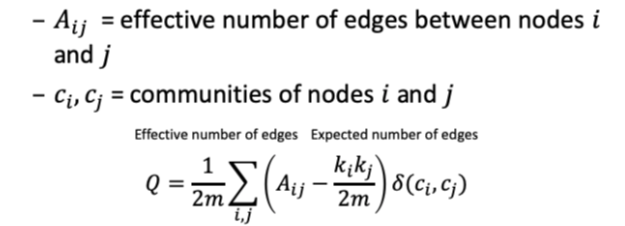

In [ ]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    m = len(G.edges)
    Q = 0
    
    for node_i in range(len(G.nodes)):
        for node_j in range(len(G.nodes)):
            if G.nodes[node_i]['community'] == G.nodes[node_j]['community']:
                # Effective link
                Aij = G.number_of_edges(node_i, node_j)
                # Outdegrees
                ki = G.degree[node_i] 
                kj = G.degree[node_j]

                Q += Aij - ki*kj / (2*m)
    
    return Q/(2*m)

## 2. Divisive algo: Girvan Newman Algo

https://github.com/taynaud/python-louvain/blob/master/community/community_louvain.py

Uses **edge betweenness** to split remove edges with HIGH betweenness (i.e. edges that all paths goes through => no other edges to go => must be a link between 2 communities)

**From final: Node betweenness centrality**:

Betweenness centrality $c_B(n)$ of a node $n$ is the sum of the fraction of all-pairs shortest paths that pass through $n$:  
  
$\Large c_B(n) =\sum_{s,t \in N} \frac{\sigma(s, t|n)}{\sigma(s, t)}$
  
where $N$ is the set of nodes, $\sigma(s, t)$ is the number of shortest paths connecting $s$ and $t$, and $\sigma(s, t|n)$ is the number of paths passing through node $n$, provided $n$ is different from $s$ and $t$. For the other cases $\sigma(s, t|n)$ is defined as follows: 
* If $s = t$: $\sigma(s, t) = 1$
* If $n \in \{s, t\}$: $\sigma(s, t|n) = 0$


In [3]:
def node_betweenness_centrality(G):
    characters = list(G.nodes())
    result   = {}

    # compute a score fo every character
    for n in characters:

        # accumulator for the score of the current character
        accum = 0

        # shortest path FROM every character...
        for i,s in enumerate(characters):

            # ..TO every character
            for j,t in enumerate(characters):
                # we do not consider the same path twice
                if j > i:
                    continue

                try:  
                    all_short = nx.all_shortest_paths(G,s,t)

                    shortest_path_through_n = 0
                    all_shortest_path = 0

                    for path in all_short:
                        all_shortest_path += 1
                        if n in path:
                            shortest_path_through_n += 1
                    
                    # Test conditions
                    if s == t:
                        all_shortest_path = 1

                    if n == t or n == s:
                        shortest_path_through_n = 0

                    accum += shortest_path_through_n / all_shortest_path


                except nx.NetworkXNoPath:
                    continue

        result[n] = accum
    return result

**Edge betweenness**:

Betweenness centrality of an edge e is the sum of the fraction of all-pairs shortest paths that pass through e:

$\Large c_B(e) =\sum_{s,t \in V} \frac{\sigma(s, t|e)}{\sigma(s, t)}$

where V is the set of nodes,`sigma(s, t)` is the number of shortest (s, t)-paths, and \sigma(s, t|e) is the number of those paths passing through edge e

In [4]:
def edge_betweenness_centrality(G):
    edges = list(G.edges())
    nodes = list(G.nodes())
    result   = {}

    # compute a score fo every edge
    for e in edges:

        # accumulator for the score of the current edge
        accum = 0

        # shortest path FROM every character...
        for i,s in enumerate(nodes):

            # ..TO every character
            for j,t in enumerate(nodes):
                # we do not consider the same path twice
                if j > i:
                    continue

                try:  
                    all_short = nx.all_shortest_paths(G,s,t)

                    shortest_path_through_e = 0
                    all_shortest_path = 0

                    for path in all_short:
                        all_shortest_path += 1
                        if (e[0] in path) and (e[1] in path):
                            shortest_path_through_e += 1
                    
                    accum += float(shortest_path_through_e) / float(all_shortest_path)


                except nx.NetworkXNoPath:
                    continue

        result[e] = accum
    return result

In [6]:
def girvan_newman(G):
# If the graph is already empty, simply return its connected
    # components.
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    # If no function is provided for computing the most valuable edge,
    # use the edge betweenness centrality.
    if most_valuable_edge is None:
        def most_valuable_edge(G):
            """Returns the edge with the highest betweenness centrality
            in the graph `G`.

            """
            # We have guaranteed that the graph is non-empty, so this
            # dictionary will never be empty.
            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)
        
    # The copy of G here must include the edge weight data.
    g = G.copy().to_undirected()
    # Self-loops must be removed because their removal has no effect on
    # the connected components of the graph.
    g.remove_edges_from(nx.selfloop_edges(g))
    while g.number_of_edges() > 0:
        yield _without_most_central_edges(g, most_valuable_edge)
        
def _without_most_central_edges(G, most_valuable_edge):
    """Returns the connected components of the graph that results from
    repeatedly removing the most "valuable" edge in the graph.

    `G` must be a non-empty graph. This function modifies the graph `G`
    in-place; that is, it removes edges on the graph `G`.

    `most_valuable_edge` is a function that takes the graph `G` as input
    (or a subgraph with one or more edges of `G` removed) and returns an
    edge. That edge will be removed and this process will be repeated
    until the number of connected components in the graph increases.

    """
    original_num_components = nx.number_connected_components(G)
    num_new_components = original_num_components
    
    while num_new_components <= original_num_components:
        edge = most_valuable_edge(G)
        G.remove_edge(*edge)
        new_components = tuple(nx.connected_components(G))
        num_new_components = len(new_components)
    return new_components

# 10. Semantic Web 

## 10.1 Semi-structured data

* **Schema** define data structure and assure coherence of data stored
* **Semi-structured data** : data that embas schema info in tags to explain the meaning of data + to relate different data values without predefined schema.
* ex. Json, xml, email

* **Schema-less** benefits : Increased flexibility, self contained, but non consistency and no optimization possible

* **XML** = document model + data model

> Document model: serialisation into a text

> Data model:specification of a conceptualization of real world


## 10.2 Problem of semantic web
**Goal: Different db uses different schema/ user-defined markup for the same concept => semantic heterogeneity. Need to convert between dbs**.
1. Standardisation: All agree on 1 user-defined markup. Ex. EDIFACT
2. Translation- Direct mapping: Schema mapping tool for data stored in relational / xml db. 
> Schema elements lkely to express the same concept => **Conflict** (1 concept in A => 2 concepts in B)
3. Annotation - Ontologie: **Ontologies are a explicit specification of a conceptualization of the real world.**

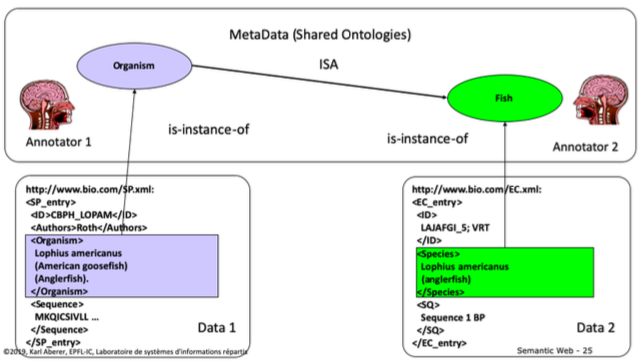

### Model requirements for Ontologies:
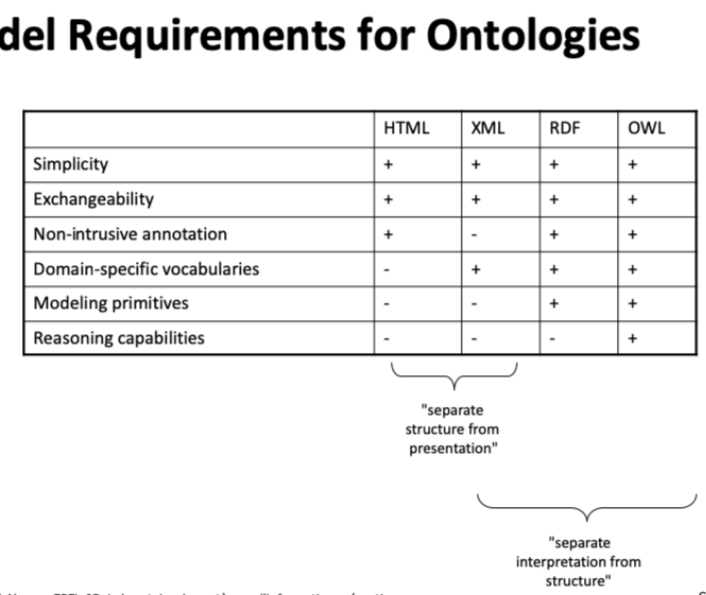


## 10.3 RDF - Resource description framework
Has **RDF Instances** + **RDF-schema**
* Similar to entity-relationship (ER) model: Entities = Resources, Relationships = Properties. 
* Difference: RDF require directed relationships: Resource = property => Object

### 10.3.1 RDF Instances (eg. XML)
* Statement about resrouces (URI) and literals (XML data)
* Statement = SUBJEECT (resource) PROPERTY(relationship) OBJECT (resource value)
* RDF statement is a resource
* **rdf:Type** indicates **class** of resource (not relationship)
* RDF complex values represented by intermediate resource (p.40)
* RDF containers: Bag (unordered), Seq (ordered) Alt (alternatives)
* **rdf:Id** is a special **property** that reference a new resource
> <dc:Document rdf:ID="1234"> ; <rdf:Description rd:about="#1234">
> 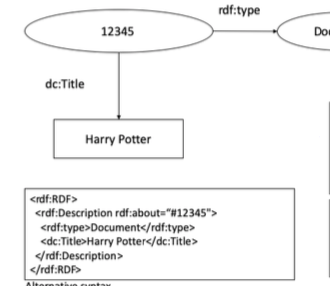

#### RDF Reitification
RDF statement commenting about another rdf statement.
* Statement = subject of new statement
* Reified statement = new resource (object)

### 10.3.2 RDF schema (eg. XML DTD)
2 mechanisms:
1. Categorize RDF resources into classes
2. Constaint on the use of properties for each class

> RDF meta-classes

> RDF classes

> RDF instances

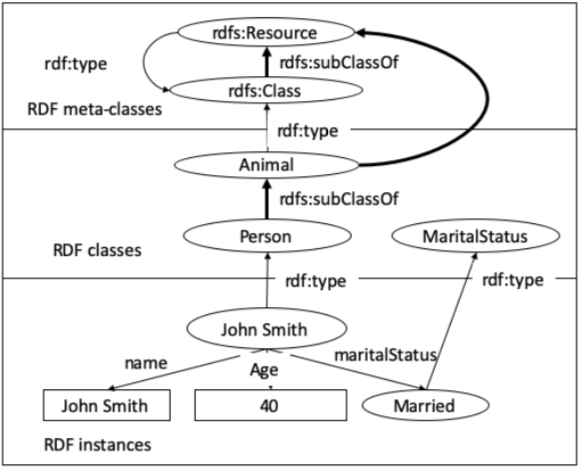


* **RDF properties can connect resources**: anything in RDF /RDF properties are resources themselves.

> RDFS: Domain - the subject when using this property must originate from that class, i.e., be of the type of this class.

> RDFS: Range (String): specifies datatype of the resouce. 

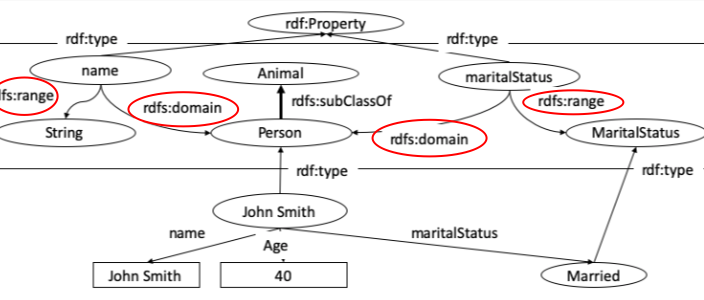


Consider the following sentences:

```Aphrodite and Eros are Gods.```

```Aphrodite is a parent of Eros.```

```Aphrodite is beautiful.```

```Aphrodite is happy.```

**Formulation as RDF statement**:

In [8]:
statements = []
#statement template: {'s':'', 'p':'', 'o':''}
statements.append({'s':'Aphrodite', 'p':'isa', 'o':'God'})
statements.append({'s':'Eros', 'p':'isa', 'o':'God'})
# statements.append({'s':'Aphrodite', 'p':'isa', 'o':'parent of Eros'})
statements.append({'s':'Aphrodite', 'p':'isParentOf', 'o':'Eros'})
statements.append({'s':'Aphrodite', 'p':'isa', 'o':'beautiful'})
statements.append({'s':'Aphrodite', 'p':'isa', 'o':'happy'})

**RDFS: Specifies the classes, instances, properties**:
- Classes: God, beautiful, happy
- Instances: Aphrodite, Eros
- Properties: (relationships) = isa, isParentOf

In [12]:
# QUERY OF WHOS IS HAPPY?
def query():
    results = []
    for statement in statements:
        if statement['p'] == 'isa' and statement['o'] == 'happy':
            results.append(statement['s'])
    print(results)

query()

['Aphrodite']


In [13]:
"""
Return statement of corresponding value to the predicate/subject/object
type_: p(redicate) / s(ubject) / o(bject)
"""
def query1(type_, value):
    results = []
    for statement in statements:
        # type_: s, p, o
        if statement[type_] == value:
            results.append(statement)
            
    return results

def query2(type1, value1, type2, value2):
    results = []
    for statement in statements:
        # type_: s, p, o
        if statement[type1] == value1 and statement[type2] == value2:
            results.append(statement)
            
    return results

Add new statements to the knowledge base according to these **inference rules**:

``` Every person is happy if one of his/her parents is successful. ```

``` All happy persons are successful. ```

A rule that would bring **inconsistency to knowledge base** : A person is not successful if one of his/her parents is successful.

In [11]:
def inference():
    
    new_statements = True

    while (new_statements):
        new_statements = False
        
        # if this person is successful
        for s1 in statements:
            if s1['p'] == 'isa' and s1['o'] == 'successful':
                for s2 in statements:
                    # ... and this person is a parent 
                    if s1['s'] == s2['s'] and s2['p'] == 'isParentOf':
                        # his children are happy too
                        statement = {'s':s2['o'], 'p':'isa', 'o':'happy'}
                        # generate new statement to search
                        if statement not in statements:
                            statements.append(statement)
                            new_statements = True
        for s in statements:
            if s['p'] == 'isa' and s['o'] == 'happy':
                    statement = {'s':s['s'], 'p':'isa', 'o':'successful'}
                    if statement not in statements:
                        statements.append(statement)
                        new_statements = True

In [14]:
# WE GET THAT EROS IS ALSO HAPPY AFTER INSERTING NEW STATEMENTS
inference()
query()

['Aphrodite', 'Eros']
